### Pandas 

### Pannel Data Analysis
### Analysis:
##### 1. Descriptive. What Happened?
##### 2. Diagnostic. Why Happened?
##### 3 Predictive. What is likely to happen ?
##### 4.Prescriptive. Prescription or action we have to take ?

### Pandas Vs Excel
##### Data Frame -------------- Worksheet 
##### Series -------------- Column 
##### Index -------------- Row Heading 
##### Row -------------- Row 
##### NaN  -------------- Empty Cell

### Cons
##### Python library
##### Data Analysis And Data Manipulation
##### Data Analysis
##### Data science
##### Ml
##### Join, merge, filter, reshape
##### Data Frames
##### Reading And Writing Data
##### Indexing And Selection
##### Missing Data
##### Data Cleaning 
##### Data Aggregation and Grouping (appling function to group of data)
##### Time Series Data (Resampling, rolling window)
##### Visualization (Charts)

## Let's Begin

In [7]:
# Importing Libraries
import numpy as np
import pandas as pd

In [8]:
# Creating A Simple DataFrame With Some Example Data

data = {
    'NAME':['Ahmad','Ali','Amir','Hassan','Abid'],
    'AGE' : [18,19,20,21,22],
    'CITY': ['LHR','RWP','ISL','LHR','FSD'],
    'EDUCATION' : ['MATRIC','INTER','BA','MPHIL','PHD'],
    'SALARY' : [5000, 10000, 15000, 20000, 25000]
}
df = pd.DataFrame(data)
df

# df02 = pd.DataFrame(np.arange(1,20+1))
# df02

# df03 = pd.Series([1,2,3,4,5])
# df03

df04 = pd.date_range("20230220", periods=6)
# df04

df05 = pd.DataFrame(np.random.rand(6, 4), index= df04, columns=list("ABCD"))
df05

# df05.to_numpy # Covert The DataFrame Into Array 
# # df05.describe

# df05[0:2] # Select The Data Row Wise 

# df05.loc[df04[4]] # Show Data Index Wise // Date Wise in this Segment // iloc try
# df05[df05 > 0.5] 

,A,B,C,D
2023-02-20,0.038686,0.498134,0.949988,0.424703
2023-02-21,0.095743,0.480433,0.709730,0.556803
2023-02-22,0.996436,0.648605,0.927570,0.693295
2023-02-23,0.209399,0.405010,0.767349,0.039255
2023-02-24,0.304238,0.697216,0.186759,0.531415
2023-02-25,0.890393,0.331960,0.410340,0.729672


### BASIC OPERATIONS

In [ ]:
# print the first few rows of dataframe 
print(df.head)


In [ ]:
# print the summary statistics of the numerical columns
print(df.describe)


In [ ]:
# Select subset of the column
print(df[['NAME','CITY']])

In [ ]:
# select row based on condition
print(df[df['AGE'] > 20])

In [ ]:
# Select Row on multiple conditions
print(df[(df['AGE'] < 22) & (df['CITY'] == 'LHR')])

In [ ]:
# Aggregations
# Group of data by a column and calculate the mean of the other column (and classified the data according to the groupby)
print(df.groupby('CITY').mean())

In [ ]:
# Group of data by a column ad calculate multiple statistics 
print(df.groupby('CITY').agg({'AGE':'mean'}))

In [ ]:
# Pivot Table
print(pd.pivot_table(df, index='CITY', columns='NAME', values='AGE'))
# Data Cleaning 


In [ ]:
# replace the missing values with a default value
df.fillna(0,inplace=True)
# replace specific values with a new value 
df.replace('FSD','KPK', inplace=True)
df
# drop column with a missing values
df.dropna(axis=1, inplace=True)
df

#### Data Transformation

In [ ]:
# applying a function to a column
df = df['AGE'].apply(lambda x : x + 1)
df

In [ ]:
# applying a function to a dataframe
# df = df.applymap(lambda x : str(x)) ??
df

In [ ]:
# apply a function to a group
def normalize(s):
    return (s - s.min())/(s.max()-s.min())

df['SALARY_normalized'] = df.groupby('CITY')['SALARY'].apply(normalize)
df

#### Merge and Join

In [ ]:
# Create a second dataframe with some additional data
data02 = {
    'NAME':['Ali','Imran','Kamran','Ahmad','Hassan','Abid'],
    'TEAM':['A','B','C','C','A','B']
}
df2 = pd.DataFrame(data02)
df2

In [ ]:
# join the two dataframes on the 'name' column
print(pd.merge(df,df2, on='NAME'))

In [ ]:
# Concatentate the two dataframes vertically
print(pd.concat([df, df2]))

In [ ]:
# Time Series
dates = pd.date_range('2023-02-20', periods=5)
ts = pd.Series(np.random.randn(5), index=dates)
ts

#### Window functions

In [ ]:
# 

#### Plotting

In [ ]:
# plot a line chart of a column
df.plot(x='NAME', y='SALARY')


Text(0.5, 0, 'SALARY')

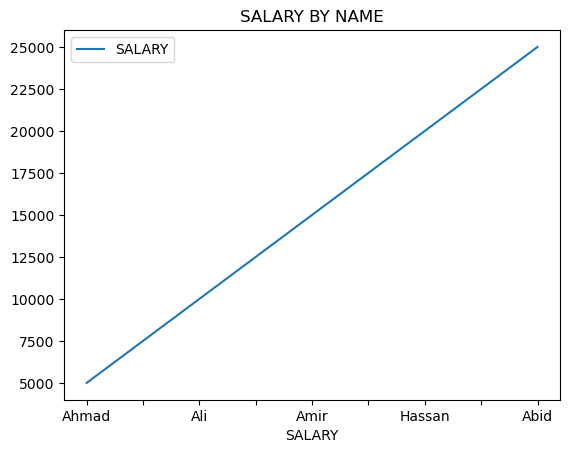

In [9]:
# Plot a scatter chart of two columns
df.plot
# plotting(continue)

# plot a line chart of a column with a title and axis labels
ax = df.plot(x='NAME', y='SALARY', title='SALARY BY NAME')
ax.set_xlabel('NAME')
ax.set_xlabel('SALARY')

In [ ]:
# plot a histogram of a column with a specific number of bins
df['AGE'].plot.hist(bins=3)

In [ ]:
# plot a scatter chart of two columns with different marker styles and colors
df.plot.scatter(x='AGE', y='SALARY', marker='D', color='green')

In [10]:
# save the plot to a file 
fig = ax.get_figure()
fig.savefig('plot.png')